## Entrenar la red neuronal VGG-16

### Importar los datos de train y test 

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Load Images
images = {
    "train":{},
    "test":{}  
}
for typ in ["train","test"]:
    #f"C:/Users/luism/Desktop/car_detectors_and_classifier/datasets/captures_vehicle_ classification/{typ}
    car_type = [p for p in os.listdir(f"datasets/captures_vehicle_ classification/{typ}")] 
    for vehicle in car_type:
        files = os.listdir(f"datasets/captures_vehicle_ classification/{typ}/{vehicle}")
        
        for file in files:
            path = f"datasets/captures_vehicle_ classification/{typ}/{vehicle}/{file}"
            img = cv2.imread(path)
            aux = img
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images[typ][vehicle] = images[typ].get(vehicle,[]) + [img]

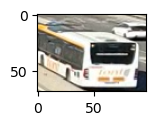

In [4]:
plt.figure(figsize=(2,1))
plt.imshow(images["train"]["bus"][0])

In [5]:
len(images["test"]["car"])

20

In [6]:
X_train = []
Y_train = []
X_test = []
Y_test = []
for typ in images:
    for vehicle in images[f"{typ}"].keys():
        for img in images[f"{typ}"][f"{vehicle}"]:
            if typ == "train":
                X_train.append(img)
                Y_train.append(vehicle)
            else:
                X_test.append(img)
                Y_test.append(vehicle)


        

In [7]:
len(X_test)

58

bus


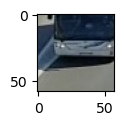

In [8]:
plt.figure(figsize=(2,1))
plt.imshow(X_test[3])
print(Y_test[3])

In [9]:
X_transformed_train = []
for img in X_train:
    im = Image.fromarray(img)
    im = im.resize((224,224))
    X_transformed_train.append(np.array(im)/255)

In [10]:
len(X_transformed_train)



206

Aplicamos "one hot encoding"

In [11]:
import pandas as pd
Y_train = pd.get_dummies(Y_train)
Y_train

,bus,car,truck
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
201,0,0,1
202,0,0,1
203,0,0,1
204,0,0,1


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


In [19]:
#definir el modelo VGG-16 preentrenado y elimina la capa superior:
model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


En este ejemplo, agregamos una capa Flatten para aplanar la salida de la última capa convolucional, seguida de dos capas densas con activación ReLU y Dropout. La última capa densa tiene una activación softmax para la clasificación de tres clases.

In [22]:
#A continuación, agrega tus propias capas personalizadas encima del modelo VGG-16 preentrenado:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_transformed_train, Y_train, batch_size=32, epochs=10, validation_split=0.2)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "sequential_1" expects 1 input(s), but it received 206 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 224, 3) dtype=float32>]


Ahora, compila el modelo y especifica el optimizador, la función de pérdida y las métricas:

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [16]:
model.fit(X_transformed_train, Y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\luism\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "sequential" expects 1 input(s), but it received 206 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 224, 3) dtype=float32>]
